In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,\
AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv('C:/Users/Administrator/Desktop/Machine Learning/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
x=df['Income']
y=df['SpendingScore']

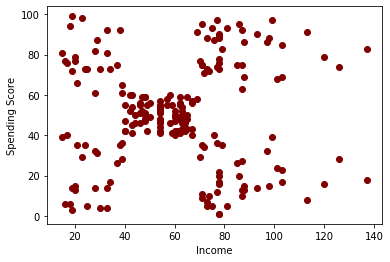

In [6]:
plt.scatter(x,y,c='maroon')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

## Clustering

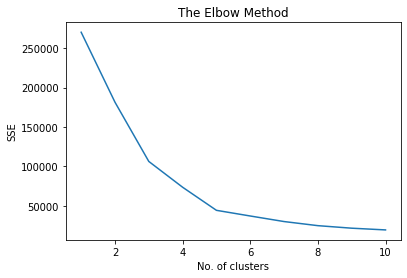

In [7]:
from sklearn.cluster import KMeans
x=df.iloc[:,[3,4]].values
ls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    ls.append(km.inertia_)
    
plt.plot(range(1,11),ls)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.show()

In [8]:
# fitting k-means to the dataset
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=5)
y_kmeans=km.fit_predict(x)

In [10]:
km.inertia_

44448.45544793371

In [11]:
#y_kmeans

In [12]:
x[y_kmeans==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

In [13]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

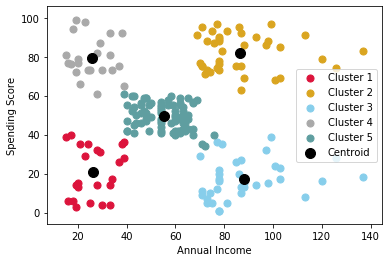

In [14]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=50,c='crimson',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=50,c='goldenrod',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=50,c='skyblue',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=50,c='darkgrey',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=50,c='cadetblue',label='Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='Centroid')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Hierarchical Clustering

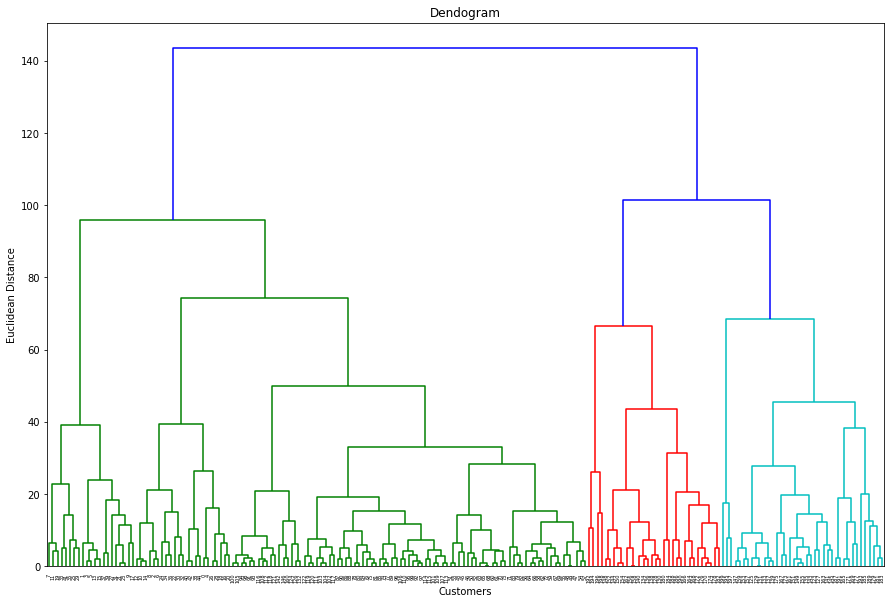

In [15]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
dendrogram= sch.dendrogram(sch.linkage(x,method='complete'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

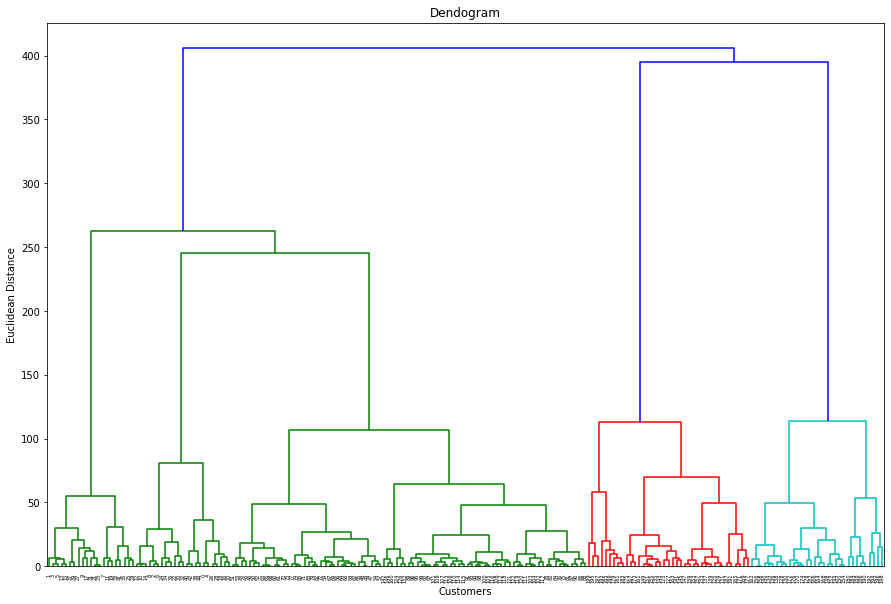

In [16]:
plt.figure(figsize=(15,10))
dendrogram= sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

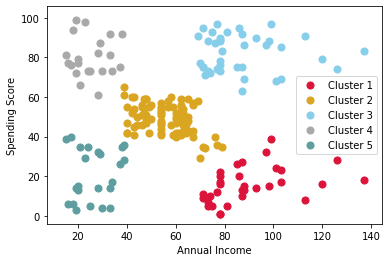

In [17]:
#Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=50,c='crimson',label='Cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=50,c='goldenrod',label='Cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=50,c='skyblue',label='Cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=50,c='darkgrey',label='Cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=50,c='cadetblue',label='Cluster 5')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [58]:
#y_hc

In [35]:
df['ClusterLabel']=y_kmeans

In [36]:
df.head()

,CustomerID,Genre,Age,Income,SpendingScore,ClusterLabel
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [37]:
df1=pd.get_dummies(df,drop_first=True)

In [38]:
df1.head()

,CustomerID,Age,Income,SpendingScore,ClusterLabel,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,3,1
2,3,20,16,6,0,0
3,4,23,16,77,3,0
4,5,31,17,40,0,0


In [40]:
df1=df1.drop('CustomerID',axis=1)

In [49]:
Y=df1['ClusterLabel']
X=df1.loc[:,df1.columns!='ClusterLabel']

In [54]:
from sklearn.preprocessing import RobustScaler
mm=RobustScaler()
df2=mm.fit_transform(X)
df2=pd.DataFrame(df2)
df2.columns=X.columns
df2.head()

,Age,Income,SpendingScore,Genre_Male
0,-0.839506,-1.273973,-0.287582,1.0
1,-0.740741,-1.273973,0.810458,1.0
2,-0.790123,-1.246575,-1.150327,0.0
3,-0.641975,-1.246575,0.705882,0.0
4,-0.246914,-1.219178,-0.261438,0.0


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=15, random_state=42) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest',\
             'Gradient Boosting','XGBoost','Bagging']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=5),\
        DecisionTreeClassifier(criterion='entropy'),GaussianNB(),\
        RandomForestClassifier(n_estimators=100),XGBClassifier(),\
       GradientBoostingClassifier(),BaggingClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.811355,0.143611
KNN,0.975092,0.035260
Decision Tree,0.954945,0.096161
Naive Bayes,0.975458,0.044677
Random Forest,0.955311,0.082158
Gradient Boosting,0.950916,0.093814
XGBoost,0.956044,0.094254
Bagging,0.945055,0.114342


In [27]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.925

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150,random_state=6)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.975


In [56]:
kfold = KFold(n_splits=15, random_state=42) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Naive Bayes']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=5),GaussianNB()
        #DecisionTreeClassifier(criterion='entropy'),\
        #RandomForestClassifier(n_estimators=100),XGBClassifier(),\
       #GradientBoostingClassifier(),BaggingClassifier()\
       ]
for i in models:
    model = i
    cv_result = cross_val_score(model,df2,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.893773,0.151840
KNN,0.945788,0.063346
Naive Bayes,0.975458,0.044677
